## Parte 1

In [116]:
import numpy as np

mean1 = 5
mean2 = -5
mean3 = 0

std1 = 1
std2 = std1
std3 = std1

N = 5000

In [117]:
X1 = np.random.normal(mean1, std1, N) # Normal distribution
X2 = np.random.normal(mean2, std2, N)
X3 = np.random.normal(mean3, std3, N)

X1 = np.expand_dims(X1, axis=0) # shape (0, 5000) to (1, 5000)
X2 = np.expand_dims(X2, axis=0)
X3 = np.expand_dims(X3, axis=0)
print(X1.shape)

(1, 5000)


In [118]:
Xu = np.vstack((X1, X2, X3)) # vertical stack arrays
print(Xu.shape)

(3, 5000)


In [123]:
Cd = np.array([[1, 1.8, -0.9], [1.8, 4, 0.6], [-0.9, 0.6, 9]])
print(Cd)

[[ 1.   1.8 -0.9]
 [ 1.8  4.   0.6]
 [-0.9  0.6  9. ]]


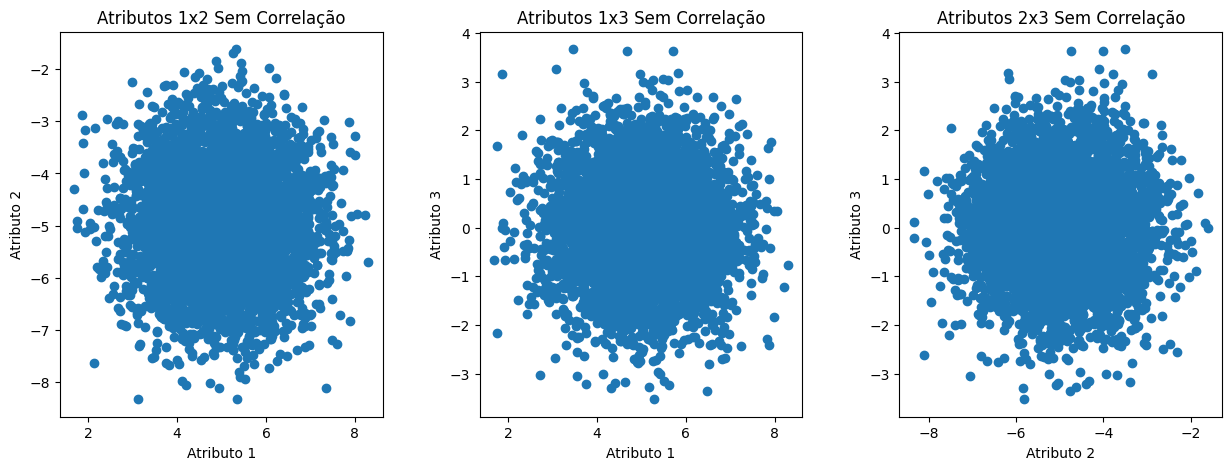

In [124]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(Xu[0, :], Xu[1, :])
axes[0].set_title("Atributos 1x2 Sem Correlação")
axes[0].set_xlabel('Atributo 1')
axes[0].set_ylabel('Atributo 2')

axes[1].scatter(Xu[0, :], Xu[2, :])
axes[1].set_title("Atributos 1x3 Sem Correlação")
axes[1].set_xlabel('Atributo 1')
axes[1].set_ylabel('Atributo 3')

axes[2].scatter(Xu[1, :], Xu[2, :])
axes[2].set_title("Atributos 2x3 Sem Correlação")
axes[2].set_xlabel('Atributo 2')
axes[2].set_ylabel('Atributo 3')
    
plt.subplots_adjust(wspace=0.3)
plt.show()

In [125]:
R = np.linalg.cholesky(Cd)
Xc = R.T @ Xu
print(Xc.shape)

(3, 5000)


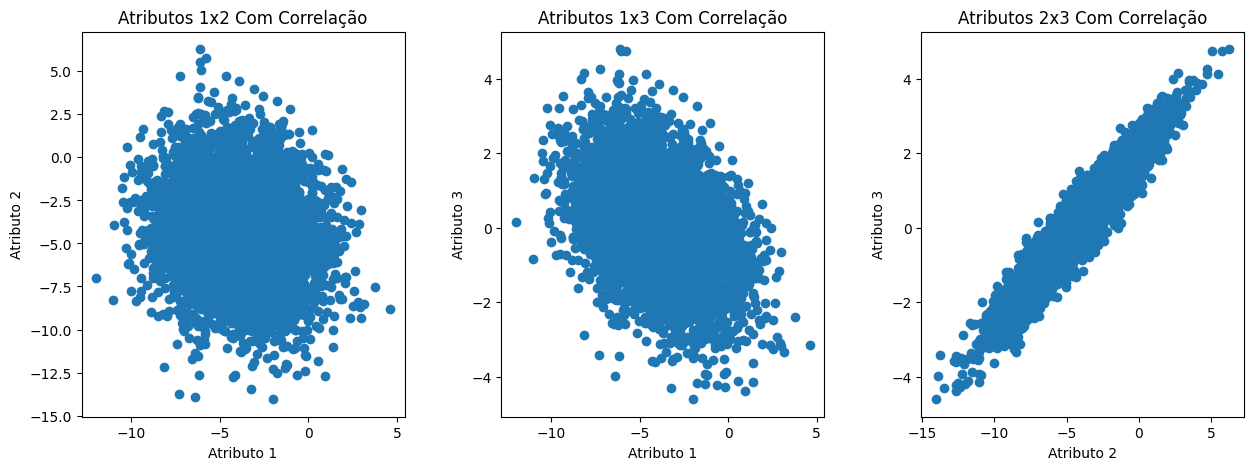

In [126]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(Xc[0, :], Xc[1, :])
axes[0].set_title("Atributos 1x2 Com Correlação")
axes[0].set_xlabel('Atributo 1')
axes[0].set_ylabel('Atributo 2')

axes[1].scatter(Xc[0, :], Xc[2, :])
axes[1].set_title("Atributos 1x3 Com Correlação")
axes[1].set_xlabel('Atributo 1')
axes[1].set_ylabel('Atributo 3')

axes[2].scatter(Xc[1, :], Xc[2, :])
axes[2].set_title("Atributos 2x3 Com Correlação")
axes[2].set_xlabel('Atributo 2')
axes[2].set_ylabel('Atributo 3')
    
plt.subplots_adjust(wspace=0.3)
plt.show()

## Parte 2

Variâncias explicada por cada autovalor: [66.1717001  33.61719783  0.21110207]
Variâncias explicadas acumulativas: [ 66.1717001   99.78889793 100.        ]
Autovetores:
 [[ 0.28237153 -0.94687849  0.15390723]
 [-0.85819421 -0.32103109 -0.40055179]
 [-0.42868288  0.01897788  0.90325568]]


Text(0, 0.5, 'Variancia Explicada')

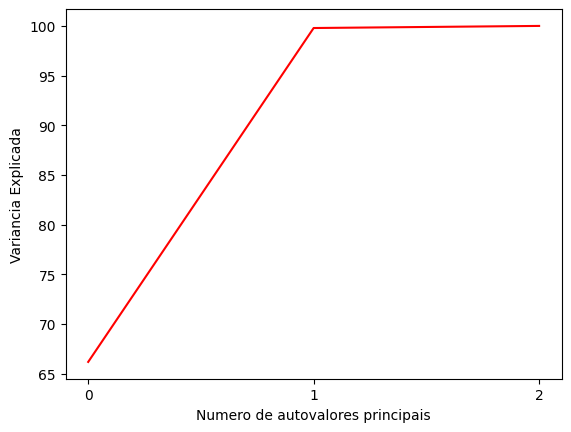

In [127]:
Cx = np.cov(Xc, rowvar=True)
eigenvalues, eigenvectors = np.linalg.eig(Cx)

idxs = eigenvalues.argsort()[::-1] # Índices do maior para o menor
eigenvalues = np.sort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idxs] # Montagem de autovetores pelos índices
Vq = eigenvectors

var_i = 100 * eigenvalues / np.sum(eigenvalues) # Variancia explicada pelo i-esimo autovalor
var_q = 100 * np.cumsum(eigenvalues) / np.sum(eigenvalues) # Variancia explicada pelos q primeiros autovalores

print("Variâncias explicada por cada autovalor:", var_i)
print("Variâncias explicadas acumulativas:", var_q)
print("Autovetores:\n", Vq)

plt.plot(var_q, color='red')
plt.xticks(np.arange(0, 3, step=1))
plt.xlabel('Numero de autovalores principais')
plt.ylabel('Variancia Explicada')

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # Sem redução de dimensionalidade
pca.fit(Xc)

print("Variâncias explicada por cada autovalor (referência):", 100*pca.explained_variance_ratio_)
print("Variâncias explicadas acumulativas (referência):", np.cumsum(100*pca.explained_variance_ratio_))

Variâncias explicada por cada autovalor (referência): [6.53758323e+01 3.46241677e+01 2.52708060e-29]
Variâncias explicadas acumulativas (referência): [ 65.37583232 100.         100.        ]


In [129]:
orthov = Vq @ Vq.T
print("Verificando se a matriz de autovetores é ortonormal: Multiplicando ela por sua transposta")
print(orthov)
print("\nArredondando:")
print(np.round(orthov))

Verificando se a matriz de autovetores é ortonormal: Multiplicando ela por sua transposta
[[1.00000000e+00 1.05364438e-16 4.27731857e-16]
 [1.05364438e-16 1.00000000e+00 1.82100221e-16]
 [4.27731857e-16 1.82100221e-16 1.00000000e+00]]

Arredondando:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [130]:
Vq_inv = np.linalg.inv(Vq)
print("Verificando se a matriz de autovetores é ortonormal: Invertendo e comparando com a transposta")
print(Vq_inv)
print(Vq.T)

Verificando se a matriz de autovetores é ortonormal: Invertendo e comparando com a transposta
[[ 0.28237153 -0.85819421 -0.42868288]
 [-0.94687849 -0.32103109  0.01897788]
 [ 0.15390723 -0.40055179  0.90325568]]
[[ 0.28237153 -0.85819421 -0.42868288]
 [-0.94687849 -0.32103109  0.01897788]
 [ 0.15390723 -0.40055179  0.90325568]]


## Parte 3

In [131]:
u, s, v = np.linalg.svd(Cx) # Com uso do SVD
print("Autovalores ordenados", s)
print("Matriz de autovetores\n", v)

Autovalores ordenados [9.52946146 4.84125073 0.03040105]
Matriz de autovetores
 [[-0.28237153  0.85819421  0.42868288]
 [-0.94687849 -0.32103109  0.01897788]
 [ 0.15390723 -0.40055179  0.90325568]]


## Parte 4

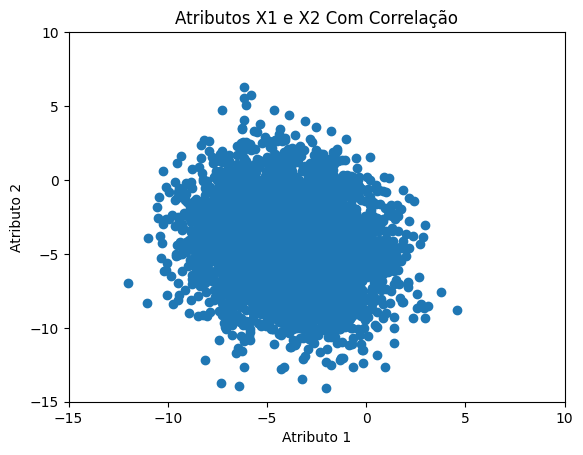

In [132]:
plt.scatter(Xc[0, :], Xc[1, :])
plt.title("Atributos X1 e X2 Com Correlação")
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.xlim(-15, 10)
plt.ylim(-15, 10)
plt.show()

In [133]:
Z = Vq.T @ Xc
Cz = np.cov(Z)
print(Cz.T)
print(np.round(Cz.T))

[[ 9.52946146e+00  7.22055831e-16 -4.20192431e-16]
 [ 7.22055831e-16  4.84125073e+00 -3.36642541e-16]
 [-4.20192431e-16 -3.36642541e-16  3.04010486e-02]]
[[10.  0. -0.]
 [ 0.  5. -0.]
 [-0. -0.  0.]]


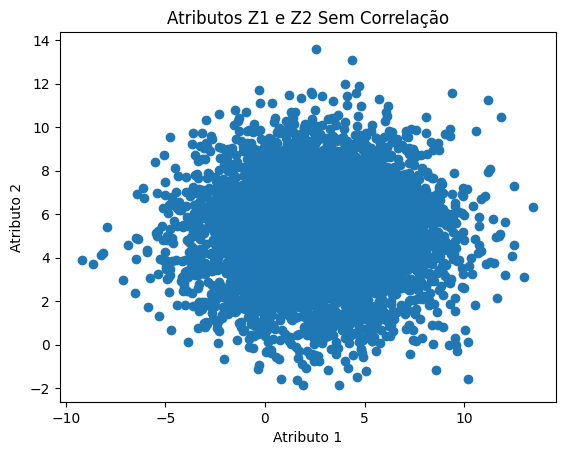

In [134]:
plt.scatter(Z[0, :], Z[1, :])
plt.title("Atributos Z1 e Z2 Sem Correlação")
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.show()

## Parte 5

In [148]:
Xr = Vq.T @ Z # Reconstrucao dos dados originais
print(Xr.shape)
print(Xc.shape)

(3, 5000)
(3, 5000)


In [151]:
E = Xc - Xr
norm = np.linalg.norm(E, 'fro')**2 # Norma de Frobenius para calcular o erro
print("Norma:", norm)

Norma: 23662.825795363264


In [152]:
E = E.flatten()  # Vetoriza matriz de erro
SSE = np.sum(E**2)  # Soma dos erros quadráticos de reconstrução

print("SSE:", SSE)

SSE: 23662.825795363264
